In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Datasets/Groundwater.csv')

In [5]:
df.sample(10)

,S.no.,Name of State,Name of District,Recharge from rainfall During Monsoon Season,Recharge from other sources During Monsoon Season,Recharge from rainfall During Non Monsoon Season,Recharge from other sources During Non Monsoon Season,Total Annual Ground Water Recharge,Total Natural Discharges,Annual Extractable Ground Water Resource,Current Annual Ground Water Extraction For Irrigation,Current Annual Ground Water Extraction For Domestic & Industrial Use,Total Current Annual Ground Water Extraction,Annual GW Allocation for Domestic Use as on 2025,Net Ground Water Availability for future use,Stage of Ground Water Extraction (%)
165,166,GUJARAT,Surendranagar,58510.53,9432.18,0.00,3791.58,71734.29,3586.71,68147.58,38159.00,1417.40,39576.40,2808.00,26968.04,58.07
179,180,HARYANA,Karnal,28421.00,18858.00,5117.00,25226.00,77622.00,7763.00,69859.00,113464.00,5232.00,118696.00,3264.00,2463.00,169.91
539,540,TELANGANA,Jangaon,18871.46,2499.81,4994.81,6614.92,32980.99,2886.10,30094.90,25735.52,2052.77,27792.83,2053.15,2586.98,92.35
421,422,ODISHA,Deogarh,22635.47,4325.72,1223.69,2910.58,31095.46,2295.53,28799.93,13300.93,1022.22,14323.15,1016.85,14370.55,49.73
590,591,UTTARPRADESH,Bijnor,86091.85,18620.56,6117.09,33226.83,144056.32,7705.56,136350.76,86514.45,7299.21,93813.66,8279.00,42652.39,68.80
332,333,MADHYAPRADESH,Sheopur,33569.28,781.99,0.00,18725.86,53077.13,4755.28,48321.85,15637.03,1739.31,17376.34,1654.47,30769.49,35.96
591,592,UTTARPRADESH,Budaun,61235.00,5039.39,967.46,11959.10,79200.95,5245.54,73955.42,52041.70,7754.47,59796.17,9007.92,14540.14,80.85
130,131,DELHI,South East Delhi,841.64,367.97,190.59,307.09,1707.29,142.42,1564.87,1426.64,1852.46,3279.10,2043.82,0.00,209.54
458,459,PUNJAB,Mohali,17874.30,4132.63,4255.94,2134.52,28397.39,2565.15,25832.24,23692.53,7176.65,30869.18,5023.46,2048.07,119.50
423,424,ODISHA,Gajapati,12426.51,2564.56,4946.34,2536.35,22473.76,1681.69,20792.07,4790.63,1717.81,6508.44,1747.94,14145.09,31.30


In [4]:
df.shape

(689, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 16 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   S.no.                                                                 689 non-null    int64  
 1   Name of State                                                         689 non-null    object 
 2   Name of District                                                      689 non-null    object 
 3   Recharge from rainfall During Monsoon Season                          684 non-null    float64
 4   Recharge from other sources During Monsoon Season                     684 non-null    float64
 5   Recharge from rainfall During Non Monsoon Season                      684 non-null    float64
 6   Recharge from other sources During Non Monsoon Season                 684 non-null    float64
 7  

In [7]:
#Detecting missing values
df.isna().sum()

S.no.                                                                   0
Name of State                                                           0
Name of District                                                        0
Recharge from rainfall During Monsoon Season                            5
Recharge from other sources During Monsoon Season                       5
Recharge from rainfall During Non Monsoon Season                        5
Recharge from other sources During Non Monsoon Season                   5
Total Annual Ground Water Recharge                                      5
Total Natural Discharges                                                5
Annual Extractable Ground Water Resource                                5
Current Annual Ground Water Extraction For Irrigation                   5
Current Annual Ground Water Extraction For Domestic & Industrial Use    0
Total Current Annual Ground Water Extraction                            5
Annual GW Allocation for Domestic Use 

In [11]:
#statewise groundwater reserve
state_list = []
total_frnd_water_recharge = []
curr_gw_extr_list = []
#Net Ground Water Availability for future use
future_available_GW_list = []

for state, subset in df.groupby('Name of State'):
    print(state, sum(subset['Net Ground Water Availability for future use']))
    state_list.append(state)
    total_frnd_water_recharge.append(sum(subset['Total Annual Ground Water Recharge']))
    curr_gw_extr_list.append(sum(subset['Total Current Annual Ground Water Extraction']))
    future_available_GW_list.append(sum(subset['Net Ground Water Availability for future use'])) 
dfnew = pd.DataFrame({"State":state_list, "GW_Recharge":total_frnd_water_recharge, "GW_Extraction": curr_gw_extr_list, "Future_GW_Available": future_available_GW_list})

A&N ISLAND 32131.52
ANDHRA PRADESH 1231396.3
ARUNACHAL PRADESH nan
ASSAM 2142976.56
BIHAR 1578245.4199999997
CHANDIGARH 416.0
CHATTISGARH 576373.37
DELHI 2299.43
Dadra & Nagar Haveli 4475.73
Daman 480.0
Diu 6.0
GOA 6992.8099999999995
GUJARAT 797646.8400000001
HARYANA 87367.91
HIMACHAL 16444.25
J&K 184433.38999999998
JHARKHAND 412800.47000000003
KARNATAKA 541171.4700000001
KERALA 241449.09999999998
LAKSHADWEEP 122.81000000000002
MADHYAPRADESH 1584187.8399999999
MAHARASHTRA 1291196.5699999998
MANIPUR 34290.53
MEGHALAYA 159096.77
MIZORAM 18092.91
NAGALAND 196308.27000000002
ODISHA 884649.9299999999
PUNJAB 108919.82999999999
Puducherry 5473.84
RAJASTHAN 88012.77999999998
SIKKIM 150728.28
TAMILNADU 565688.6200000001
TELANGANA 426060.85000000003
TRIPURA 111249.36
UTTARAKHAND 124890.45
UTTARPRADESH 2036249.3599999999
WEST BENGAL 1418882.5500000003


### Exploratory Data Analysis (EDA) 

Total Rechage, Extraction, Future Availability and Annual Reserve by States in India

In [12]:
dfnew.sort_values(['GW_Recharge','GW_Extraction'], inplace= True)
dfnew['annual_reserve'] = dfnew['GW_Recharge']-dfnew['GW_Extraction']
dfnew

,State,GW_Recharge,GW_Extraction,Future_GW_Available,annual_reserve
10,Diu,471.00,386.00,6.00,85.00
19,LAKSHADWEEP,1072.80,238.10,122.81,834.70
9,Daman,1304.00,635.00,480.00,669.00
5,CHANDIGARH,4216.00,3378.00,416.00,838.00
8,Dadra & Nagar Haveli,6861.59,2042.86,4475.73,4818.73
24,MIZORAM,21280.76,731.88,18092.91,20548.88
28,Puducherry,22633.18,15140.82,5473.84,7492.36
11,GOA,26722.34,5371.36,6992.81,21350.98
7,DELHI,32100.02,35990.29,2299.43,-3890.27
0,A&N ISLAND,36841.83,908.17,32131.52,35933.66


Annual Reserve of Ground water by states, Green bars indicate positive annual reserve, while Red value indicates negative annual reserve.

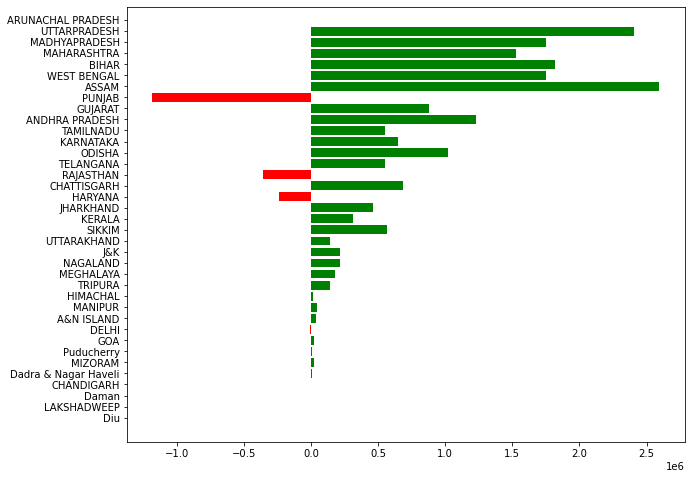

In [13]:
f, ax = plt.subplots(figsize=(10,8))
plt.barh(dfnew['State'],dfnew['annual_reserve'], color=(dfnew['annual_reserve']>0).map({True: 'g',False: 'r'}))
plt.show()

Data shows Haryana, Rajasthan, Punjab, Delhi are in critial zone as Ground water Extraction is almost equal to the availability. If groundwater distribution is not planned properly, severe shortage of water can happen in future.

#### Following analysis indiates Groundwater Extraction vs Availability

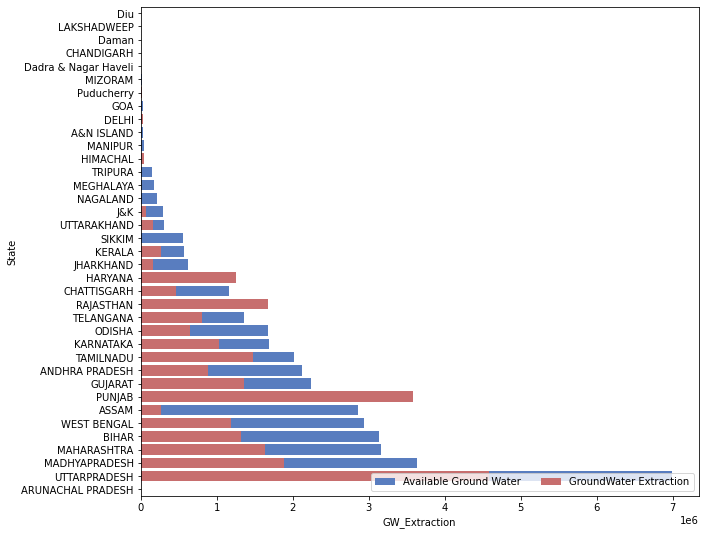

In [14]:
f, ax = plt.subplots(figsize=(10, 9))

sns.set_color_codes("muted")
sns.barplot(x='GW_Recharge', y= 'State', data = dfnew, label = 'Available Ground Water', color='b')
sns.barplot(x='GW_Extraction', y= 'State', data = dfnew, label = 'GroundWater Extraction', color='r')
ax.legend(ncol=2, loc="lower right", frameon=True)
plt.show()

#### Future Ground water availability in different states in India

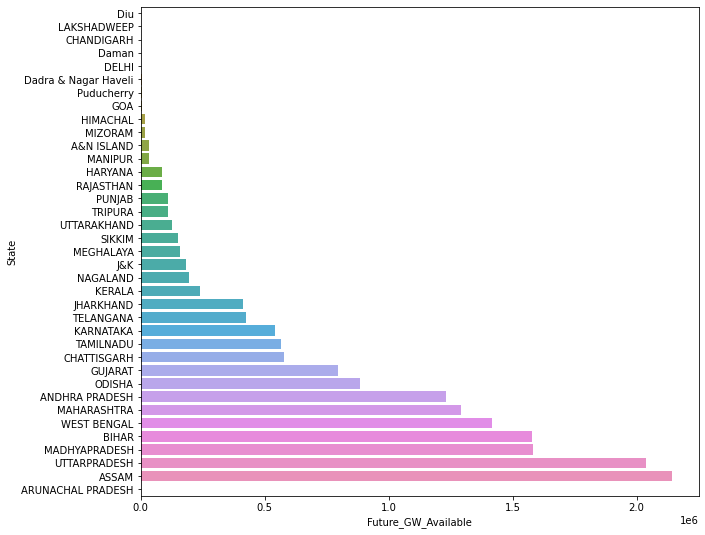

In [15]:
dfnew.sort_values('Future_GW_Available', inplace = True)
f, ax = plt.subplots(figsize=(10, 9))
sns.barplot(x='Future_GW_Available', y = 'State',data = dfnew)
plt.show()

No data is available for ArunachalPradesh, Other than that Assam , UttarPradesh, Madhya Pradesh and Bihar has higher future Reserve.

In [16]:
dfnew.count()

State                  37
GW_Recharge            36
GW_Extraction          36
Future_GW_Available    36
annual_reserve         36
dtype: int64

District level Analysis

In [17]:
df_westbengal = df[df['Name of State']=='WEST BENGAL']
df_westbengal.head()

,S.no.,Name of State,Name of District,Recharge from rainfall During Monsoon Season,Recharge from other sources During Monsoon Season,Recharge from rainfall During Non Monsoon Season,Recharge from other sources During Non Monsoon Season,Total Annual Ground Water Recharge,Total Natural Discharges,Annual Extractable Ground Water Resource,Current Annual Ground Water Extraction For Irrigation,Current Annual Ground Water Extraction For Domestic & Industrial Use,Total Current Annual Ground Water Extraction,Annual GW Allocation for Domestic Use as on 2025,Net Ground Water Availability for future use,Stage of Ground Water Extraction (%)
653,654,WEST BENGAL,Coochbehar,185334.09,5143.37,60379.13,12100.71,262957.30,26295.71,236661.59,42261.5,4447.27,46708.77,5988.25,188411.84,20.0
654,655,WEST BENGAL,Jalpaiguri,228086.62,3939.51,65301.46,12078.29,309405.88,30940.59,278465.29,8241.2,4395.75,12636.95,5908.97,264315.12,5.0
655,656,WEST BENGAL,Darjeeling,39186.21,0.00,13052.71,0.00,52238.92,5223.89,47015.03,1169.1,1478.05,2647.15,2012.74,43833.19,6.0
656,657,WEST BENGAL,Uttar Dinajpur,91467.43,7541.41,22166.67,24353.83,145529.34,12014.51,133514.83,78133.6,4811.27,82944.87,7569.33,47811.90,62.0
657,658,WEST BENGAL,Dakshin Dinajpur,65504.74,6432.72,17257.72,18756.55,107951.73,9115.64,98836.09,50706.0,2618.71,53324.71,3349.33,44780.76,54.0


In [18]:
for state in list(df['Name of State'].unique()):
    print(state)

ANDHRA PRADESH
ARUNACHAL PRADESH
ASSAM
BIHAR
CHATTISGARH
DELHI
GOA
GUJARAT
HARYANA
HIMACHAL
J&K
JHARKHAND
KARNATAKA
KERALA
MADHYAPRADESH
MAHARASHTRA
MANIPUR
MEGHALAYA
MIZORAM
NAGALAND
ODISHA
PUNJAB
RAJASTHAN
SIKKIM
TAMILNADU
TELANGANA
TRIPURA
UTTARPRADESH
UTTARAKHAND
WEST BENGAL
A&N ISLAND
CHANDIGARH
Dadra & Nagar Haveli
Daman
Diu
LAKSHADWEEP
Puducherry


#### Annual Ground-water allocation estimated to the districts in West-Bengal

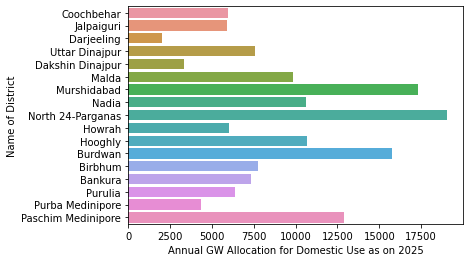

In [19]:
sns.barplot(x = 'Annual GW Allocation for Domestic Use as on 2025', y = 'Name of District', data = df[df['Name of State']=='WEST BENGAL'])
plt.show()

North 24-Parganas, Murshidabad and Nadia are top 3 estimated districtics by Ground water allocation 

In [20]:
df_westbengal.sort_values('Stage of Ground Water Extraction (%)',ascending=False, inplace = True)
df_westbengal[['Name of State','Name of District','Stage of Ground Water Extraction (%)']].head(3)

<ipython-input-20-46c18a10a9a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_westbengal.sort_values('Stage of Ground Water Extraction (%)',ascending=False, inplace = True)


,Name of State,Name of District,Stage of Ground Water Extraction (%)
660,WEST BENGAL,Nadia,92.0
659,WEST BENGAL,Murshidabad,87.0
661,WEST BENGAL,North 24-Parganas,66.0


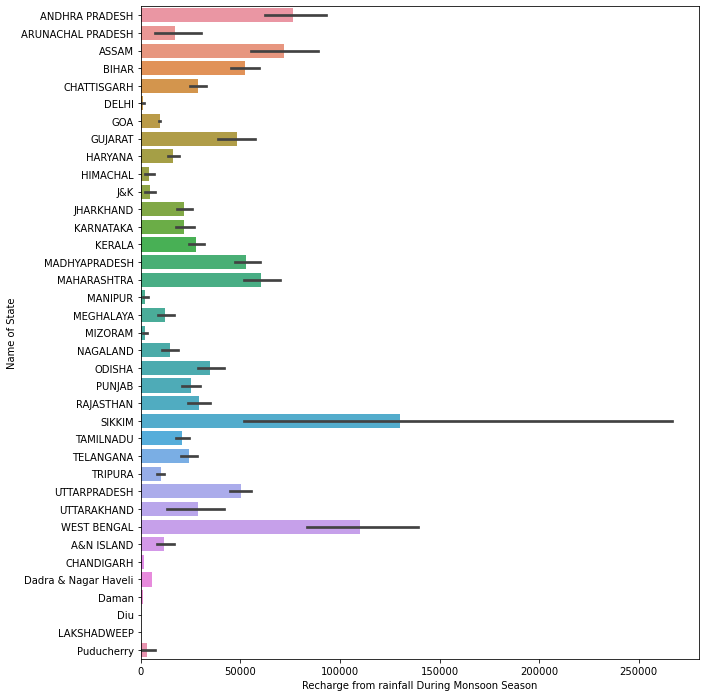

In [22]:
plt.figure(figsize=(10,12))
sns.barplot(x='Recharge from rainfall During Monsoon Season', y='Name of State', data = df)
plt.show()

#### State-wise Ground Water Extraction Distributions statistics.

0 UTTARPRADESH
1 MADHYAPRADESH
2 BIHAR
3 MAHARASHTRA
4 RAJASTHAN
5 GUJARAT
6 TAMILNADU
7 TELANGANA
8 ODISHA
9 KARNATAKA
10 ASSAM
11 CHATTISGARH
12 JHARKHAND
13 PUNJAB
14 HARYANA
15 J&K
16 WEST BENGAL
17 ARUNACHAL PRADESH
18 KERALA
19 ANDHRA PRADESH
20 DELHI
21 NAGALAND
22 MEGHALAYA
23 MANIPUR
24 LAKSHADWEEP
25 HIMACHAL
26 TRIPURA
27 MIZORAM
28 UTTARAKHAND
29 SIKKIM
30 A&N ISLAND
31 Puducherry
32 GOA
33 CHANDIGARH
34 Daman
35 Dadra & Nagar Haveli


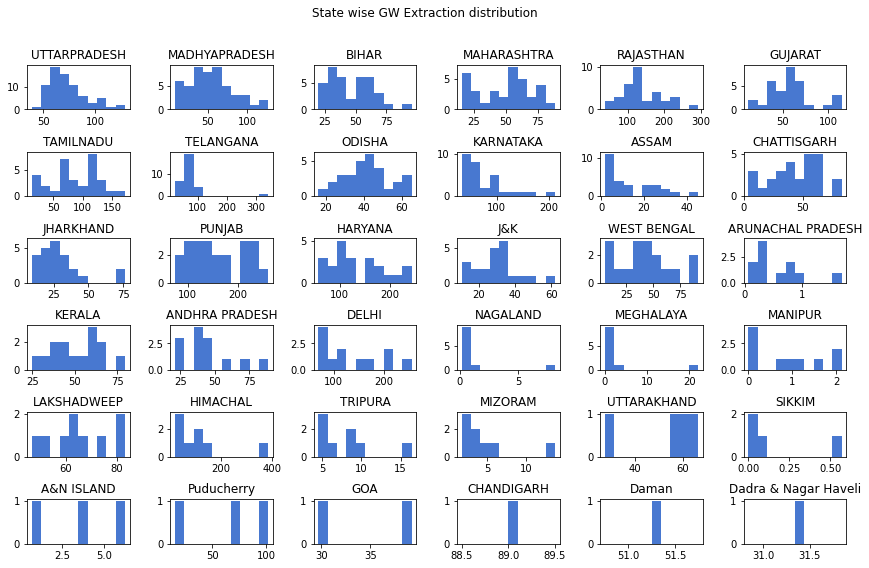

In [23]:
fig,axs = plt.subplots(6,6,figsize=(12,8))

for idx,state in enumerate(df['Name of State'].value_counts().sort_values(ascending=False)[0:36].index):
    print(idx,state)
    axs[idx//6,idx%6].hist(x = df[df['Name of State']==state]['Stage of Ground Water Extraction (%)'], color='b')
    axs[idx//6,idx%6].set_title(state)
plt.suptitle("State wise GW Extraction distribution")
plt.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()

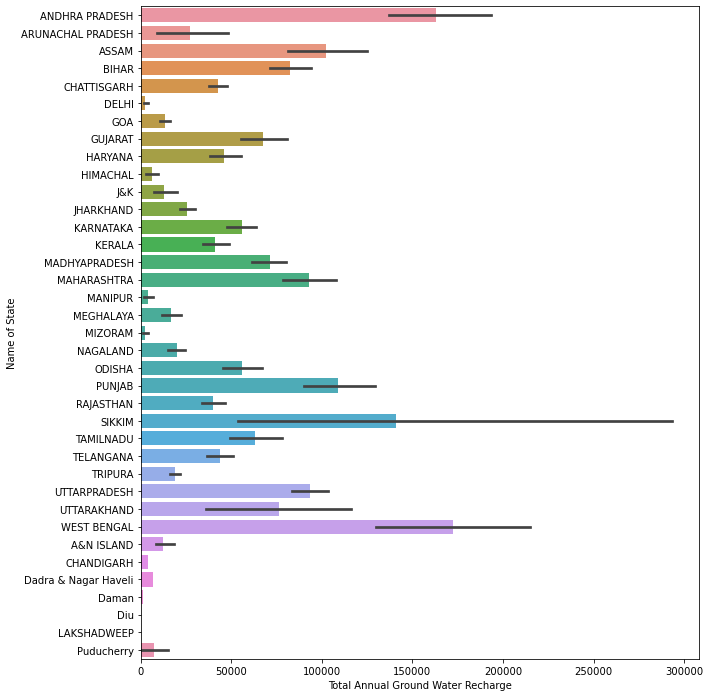

In [33]:
plt.figure(figsize=(10,12))
sns.barplot(x='Total Annual Ground Water Recharge', y='Name of State', data = df)
plt.show()